In [1]:
from random_stock_price_generator import RandomStockPrices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Taking a look at the distribution of initial prices..

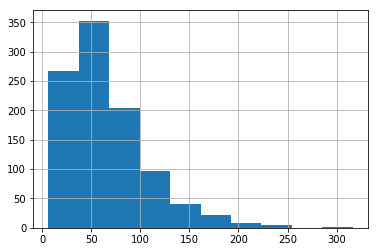

In [2]:
rp = RandomStockPrices()
prices = rp.prices
returns = rp.returns
distributions = rp.distributions
initial_prices = prices.iloc[0,:].hist()

In [3]:
prices.head()
returns.head()

,TICK0,TICK1,TICK2,TICK3,TICK4,TICK5,TICK6,TICK7,TICK8,TICK9,...,TICK990,TICK991,TICK992,TICK993,TICK994,TICK995,TICK996,TICK997,TICK998,TICK999
2018-01-01,-0.045195,0.012245,0.009876,-0.002073,0.012067,0.005681,0.004269,-0.007650,0.012729,0.001854,...,-0.015332,-0.018424,-0.019971,0.000402,-0.002406,0.017049,-0.021813,0.007743,0.003830,0.002731
2018-01-02,-0.011386,0.020617,-0.016337,-0.014433,0.004301,0.011203,0.005987,-0.006725,-0.006952,-0.000435,...,-0.013737,-0.001450,0.008918,0.000195,0.001733,0.010749,-0.016456,-0.021244,-0.021147,0.007538
2018-01-03,0.006874,-0.015844,-0.017392,0.015042,0.004574,-0.015122,0.012004,0.009385,0.004124,-0.003136,...,0.005826,0.004264,0.016277,0.015262,0.001832,0.008706,0.008736,-0.002861,0.000408,-0.008986
2018-01-04,-0.024951,0.009066,0.002885,0.037794,0.009073,0.006833,0.007484,0.016226,0.008805,-0.010083,...,-0.002151,-0.013316,-0.011666,0.008989,-0.002222,0.003470,-0.009878,0.005069,0.017047,0.002420
2018-01-05,-0.008522,-0.005779,0.003638,-0.006814,0.005399,-0.005611,-0.020970,0.009726,-0.007698,0.007682,...,-0.025421,0.006144,-0.005377,0.008334,0.000519,-0.022504,-0.002082,0.004754,0.015732,-0.013538


In [4]:
first = distributions[0]
first

(0.14573887654794593, 0.29617309074328807)

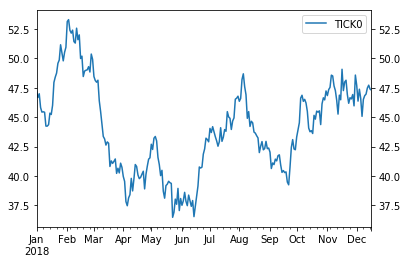

In [5]:
first_plot = prices[['TICK0']].plot()
first_plot.tick_params(labelright=True, right=True)
plt.show()

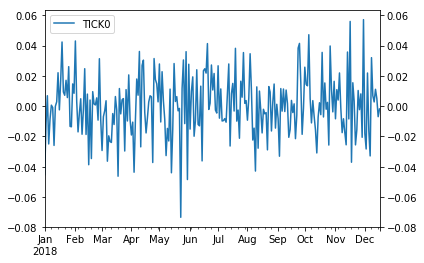

In [6]:
returns_first_plot = returns[['TICK0']].plot()
returns_first_plot.tick_params(labelright=True, right=True)
plt.show()

In [7]:
first_returns = returns[['TICK0']].values
mu = round(first_returns.mean() * 252, 4)
std = round(first_returns.std() * np.sqrt(252), 4)
print('mean is : ', mu)
print('std is : ', std)

mean is :  0.0085
std is :  0.3246


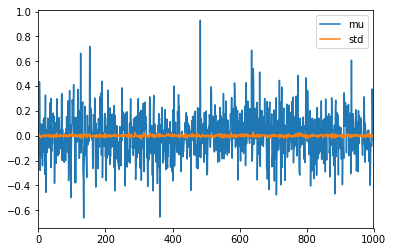

avg mu diff: 0.0061
avg std diff: 0.0000
avg initial price: 66.1646
avg ending price: 70.2742


In [8]:
mu_diffs = []
std_diffs = []
for i in range(len(returns.columns)):
    rets = returns[['TICK{}'.format(i)]].values
    mu = round(rets.mean()*252, 4)
    std = round(rets.std()*np.sqrt(252), 4)
    dist = rp.distributions[i]
    dist_mu = round(dist[0],4)
    dist_std = round(dist[1], 4)
    mu_diff = (mu-dist_mu)
    std_diff = (std-dist_std)
    if std > 0.0:
        mu_diffs.append(mu_diff)
        std_diffs.append(std_diff)

diff_df = pd.DataFrame({'mu': mu_diffs, 'std': std_diffs})
plot = diff_df.plot()
plt.show()
print('avg mu diff: {0:.4f}'.format(diff_df['mu'].mean()))
print('avg std diff: {0:.4f}'.format(diff_df['std'].mean()))
print('avg initial price: {0:.4f}'.format(prices.iloc[0,:].mean()))
print('avg ending price: {0:.4f}'.format(prices.iloc[-1,:].mean()))
